# Marriage Age Prediction

In [1]:
#import important libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [2]:
#read the dataset
df=pd.read_csv('age_of_marriage_data.csv')
df.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


In [3]:
df.isnull().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [4]:
df.shape

(2567, 10)

In [5]:
#drop all NaN value
df.dropna(inplace=True)

In [6]:
df.gender.value_counts()

male      980
female    952
Name: gender, dtype: int64

In [7]:
df.dtypes

id                   int64
gender              object
height              object
religion            object
caste               object
mother_tongue       object
profession          object
location            object
country             object
age_of_marriage    float64
dtype: object

In [8]:
#function to convert height in centimetres
def conv_h(h):
    return int(h.split('\'')[0])*30.48+int(h.split('\'')[1].replace('"',''))*2.54  


In [9]:
df['heights'] = df.height.apply(conv_h)

In [10]:
df.head(10)

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage,heights
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,170.18
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,170.18
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0,152.40
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,165.10
5,6,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0,165.10
6,7,female,"5'2""",Hindu,Rajput - Lodhi,Hindi,Banking Professional,Jodhpur,India,28.0,157.48
7,8,male,"5'5""",Hindu,Bhatia,Punjabi,Entrepreneurs / Business,Faridabad,India,30.0,165.10
8,9,female,"5'5""",Jain,Shwetamber,Gujarati,Software Professional,Vadodara,India,35.0,165.10
9,10,female,"5'1""",Hindu,Billava,Tulu,HR Professional,Bengaluru / Bangalore,India,32.0,154.94
11,12,male,"5'9""",Hindu,Brahmin,Bengali,Finance Professional,Suri,India,32.0,175.26


In [11]:
#drop some columns
df.drop(['height','profession','location'],inplace=True,axis=1)

In [12]:
df.shape

(1932, 8)

In [13]:
df.isnull().sum()

id                 0
gender             0
religion           0
caste              0
mother_tongue      0
country            0
age_of_marriage    0
heights            0
dtype: int64

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


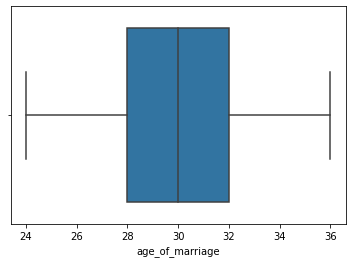

In [14]:
# checking for outliers
sns.boxplot(df.age_of_marriage)

In [15]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.loc[:,['gender','religion','country','mother_tongue','caste']]=df.loc[:,['gender','religion','country','mother_tongue','caste']].apply(enc.fit_transform) 


In [16]:
df.dtypes

id                   int64
gender               int64
religion             int64
caste                int64
mother_tongue        int64
country              int64
age_of_marriage    float64
heights            float64
dtype: object

In [17]:
df.head(10)

,id,gender,religion,caste,mother_tongue,country,age_of_marriage,heights
1,2,1,2,34,6,19,32.0,170.18
2,3,1,1,14,8,5,32.0,170.18
3,4,0,1,36,8,5,30.0,152.40
4,5,1,0,13,13,5,30.0,165.10
5,6,1,1,38,8,5,29.0,165.10
6,7,0,1,28,8,5,28.0,157.48
7,8,1,1,11,20,5,30.0,165.10
8,9,0,2,34,6,5,35.0,165.10
9,10,0,1,12,25,5,32.0,154.94
11,12,1,1,14,2,5,32.0,175.26


In [18]:
df.shape

(1932, 8)

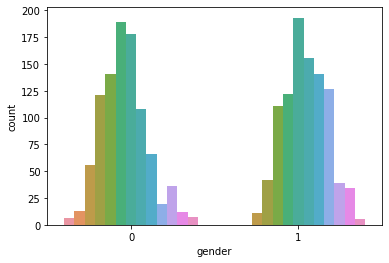

In [19]:
sns.countplot(x='gender',hue='age_of_marriage',data=df) 
plt.legend([],[], frameon=False)
plt.show()

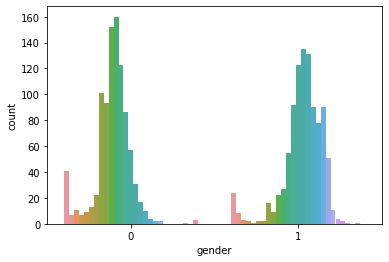

In [20]:
sns.countplot(x='gender',hue='heights',data=df) 
plt.legend([],[], frameon=False)
plt.show()

In [21]:
X = df.loc[:,['gender','heights','religion','caste','mother_tongue','country']]
y = df.age_of_marriage 


In [22]:
X.head()

,gender,heights,religion,caste,mother_tongue,country
1,1,170.18,2,34,6,19
2,1,170.18,1,14,8,5
3,0,152.40,1,36,8,5
4,1,165.10,0,13,13,5
5,1,165.10,1,38,8,5


In [23]:
X.shape

(1932, 6)

In [24]:
y.shape

(1932,)

In [25]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 


In [26]:
from sklearn.tree import DecisionTreeRegressor  

  
# create a regressor object 

regressor = DecisionTreeRegressor(random_state = 24)  

  
# fit the regressor with X and Y data 
regressor.fit(X, y) 
# prediction
y_predict=regressor.predict(X_test)


In [27]:
# checking for the accuracy
from sklearn.metrics import mean_absolute_error, r2_score
print("MAE : ", mean_absolute_error(y_test,y_predict))
r2_score(y_test,y_predict)*100

MAE :  0.40471674876847286


91.30554994813204

In [28]:
import pickle 
#export the model
pickle.dump(regressor, open('age_marriage.pkl', 'wb'))